In [ ]:
from google.colab import drive

# mount Google Drive
drive.mount('/content/drive')

# akses direktori pada Google Drive
path = '/content/drive/MyDrive/brain tumor/'

Mounted at /content/drive


In [ ]:
import os

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/brain tumor'

# Join the path to your dataset folder with the specific dataset directory
dataset_path = os.path.join(drive_path, 'training', 'testing')

In [ ]:
# akses direktori pada Google Drive
path = '/content/drive/MyDrive/brain tumor/'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical



In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:


import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/brain tumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m1(30).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m (97).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m3 (157).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m3 (220).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m3 (100).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m1(26).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m3 (161).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m1(59).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m3 (51).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m3 (174).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m2 (173).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m2 (43).jpg
/content/drive/MyDrive/brain tumor/Training/meningioma_tumor/m2 (39).jpg
/content/drive/MyDrive/brain tumor/Training/menin

In [ ]:
dir='/content/drive/MyDrive/brain tumor'
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
%config Completer.use_jedi = False

In [ ]:
x_dataset=[]
y_dataset=[]
src=os.listdir('/content/drive/MyDrive/brain tumor/Testing')
i=0
for filename in src:
    full_file_name='/content/drive/MyDrive/brain tumor/Testing'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=0
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

1
2
3
4


In [ ]:
src=os.listdir('/content/drive/MyDrive/brain tumor/Training')
for filename in src:
    full_file_name='/content/drive/MyDrive/brain tumor/Training'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=1
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

5
6
7
8


In [ ]:
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
y_dataset=Y_dataset.reshape((8,1))

**Now shuffling the whole dataset such that samples get mixed**

In [ ]:
from sklearn.utils import shuffle
X_dataset,Y_dataset=shuffle(X_dataset,Y_dataset,random_state=0)

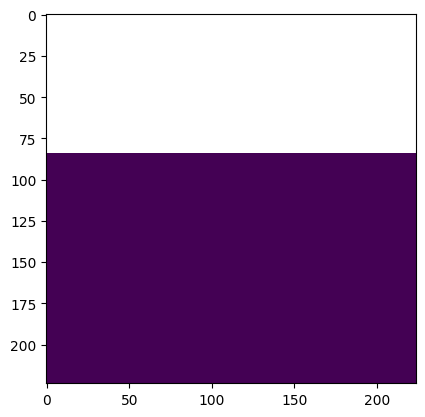

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_dataset[2])
plt.show()

In [ ]:
yes_len=0
no_len=0
for i in range(8):
    if Y_dataset[i]==0:
        no_len+=1
    else:
        yes_len+=1
print(yes_len)
print(no_len)

4
4


<Axes: >

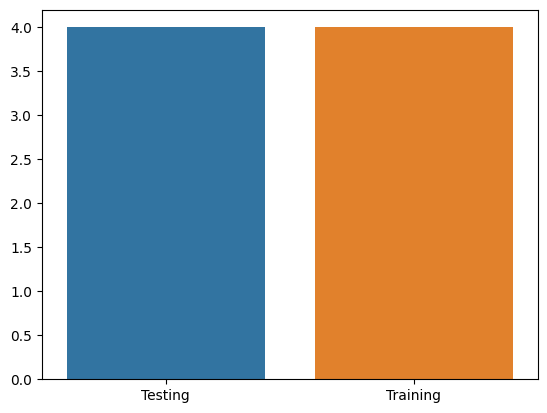

In [ ]:
import seaborn as sns
sns.barplot(x=['Testing','Training'],y=[no_len,yes_len])

**Breakdown in Train and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_dataset,Y_dataset,test_size=0.20)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Misalnya, Anda memiliki dua kelas (0 dan 1)
n_splits = 2  # Jumlah lipatan (folds)
test_size = 0.5  # Ukuran set tes (setengah dari data)

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=1)

# Kemudian, Anda dapat mengggunakan 'sss.split(x_train, y_train)' untuk mendapatkan indeks lipatan
for train_index, test_index in sss.split(x_train, y_train):
    X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Misalnya, Anda memiliki dua kelas (0 dan 1)
n_splits = 5  # Jumlah lipatan (folds)
test_size = 0.2  # Ukuran set tes (bisa diubah sesuai kebutuhan)

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=1)

# Kemudian, Anda dapat mengggunakan 'sss.split(x_train, y_train)' untuk mendapatkan indeks lipatan
for train_index, test_index in sss.split(x_train, y_train):
    X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

# Selanjutnya, Anda dapat menggunakan indeks ini untuk melatih dan menguji model pada setiap lipatan

In [ ]:
nasnet=tf.keras.applications.inception_v3.InceptionV3(include_top=False,input_shape=(224,224,3))
x=tf.keras.layers.Flatten()(nasnet.output)
x=tf.keras.layers.Dense(1)(x)
out=tf.keras.layers.Activation(activation='sigmoid')(x)

model=tf.keras.Model(inputs=nasnet.input,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_847 (Activation  (None, 111, 111, 32)         0         ['batch_normalization_94

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
from matplotlib import pyplot as plt

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/brain tumor'

In [ ]:
# Define input shape
input_shape = (224, 224, 3)  # Sesuaikan dengan persyaratan input NASNet

# Load pre-trained NASNet model
base_model = tf.keras.applications.NASNetMobile(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet')


In [ ]:
# Tambahkan lapisan tambahan
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # Diasumsikan klasifikasi biner

In [ ]:
# Buat model
model = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Tentukan path ke folder dataset pelatihan dan pengujian
training_dataset_path = os.path.join(drive_path, 'Training')
testing_dataset_path = os.path.join(drive_path, 'Testing')

In [ ]:
# Muat data pelatihan
train_generator = datagen.flow_from_directory(
    training_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 2870 images belonging to 4 classes.


In [ ]:
# Muat data pengujian
test_generator = datagen.flow_from_directory(
    testing_dataset_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 394 images belonging to 4 classes.


In [ ]:
# Latih model
epochs = 5  # Anda dapat menyesuaikan jumlah epoch
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator))

Epoch 1/5
90/90 [==============================] - 1337s 14s/step - loss: 0.9443 - accuracy: 0.7314 - val_loss: 63.8102 - val_accuracy: 0.7398
Epoch 2/5
90/90 [==============================] - 1145s 13s/step - loss: 0.5810 - accuracy: 0.7465 - val_loss: 0.5626 - val_accuracy: 0.7500
Epoch 3/5
90/90 [==============================] - 1223s 14s/step - loss: 0.5723 - accuracy: 0.7472 - val_loss: 0.6733 - val_accuracy: 0.7500
Epoch 4/5
90/90 [==============================] - 1443s 16s/step - loss: 0.5685 - accuracy: 0.7493 - val_loss: 3.9407 - val_accuracy: 0.7500
Epoch 5/5
90/90 [==============================] - 1365s 15s/step - loss: 0.5672 - accuracy: 0.7497 - val_loss: 2.5931 - val_accuracy: 0.7500


In [ ]:
# Hitung akurasi
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy}")

13/13 [==============================] - 68s 5s/step - loss: 2.7550 - accuracy: 0.7500
Test Accuracy: 0.75


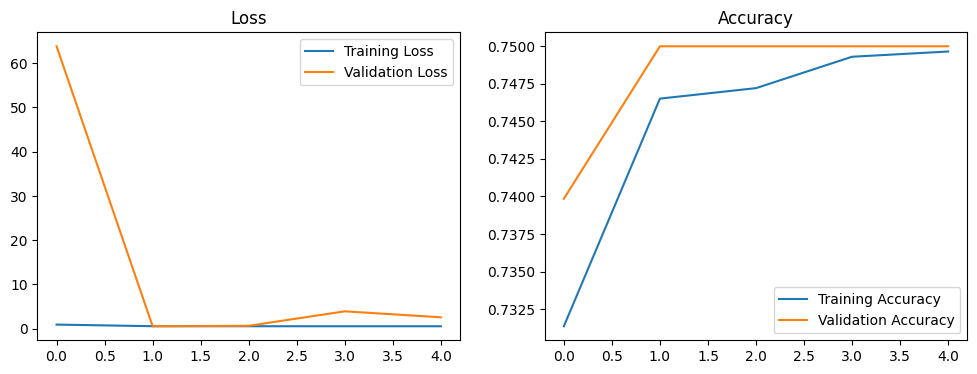

In [ ]:
# Plot grafik loss dan akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()